<a href="https://colab.research.google.com/github/Subhajit-Dey45/HousePricePrediction-using-ML/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#House Price Prediction Project

##Contribution-Subhajit Dey

#Introduction
This project focuses on predicting house prices in California using machine learning techniques. The dataset contains various features related to housing characteristics, location, and demographics. The goal is to build a predictive model that can accurately estimate median house values based on these features, which can be valuable for real estate professionals, homeowners, and policymakers.

#Problem Description

The project aims to predict California housing prices using machine learning techniques. The dataset contains 20,640 entries with 10 features related to housing characteristics, location, and demographics. The challenge is to estimate median house values from these features, helping stakeholders like real estate professionals, homeowners, and policymakers.

#Summary

Libraries used: NumPy, Pandas, Matplotlib, Seaborn, Plotly, Scikit-learn.

Dataset: California housing dataset with minimal missing values.

Data preprocessing included creating income categories for stratified sampling.

Exploratory Data Analysis (EDA) revealed strong correlations of median income and location with house prices.

Machine learning models applied: Linear Regression, Decision Trees, Random Forest, Gradient Boosting, XGBoost.



In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

This section imports essential Python libraries for data manipulation (NumPy, Pandas), visualization (Matplotlib, Seaborn, Plotly), and machine learning.

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("camnugent/california-housing-prices")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/california-housing-prices


In [3]:
import os
os.listdir(path)
df=pd.read_csv(path+'/housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


The dataset has 20,640 entries with 10 features.

#Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
#check null values
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


This Dataset has very little null values

In [7]:
#Fill null data
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [8]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


#Exploratory Data Analysis (EDA)

In [9]:
# Basic statistics
print("Numerical features statistics:")
display(df.describe())

Numerical features statistics:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
# Create income categories (binning median_income)
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

The code creates a new categorical variable income_cat by binning the continuous median_income values into 5 discrete categories. This transformation serves several important purposes.

* Enables income-based segmentation in analysis

* Facilitates comparison across income groups

* Reduces the impact of extreme income outliers

* Supports categorical analysis methods that work better with discrete variables

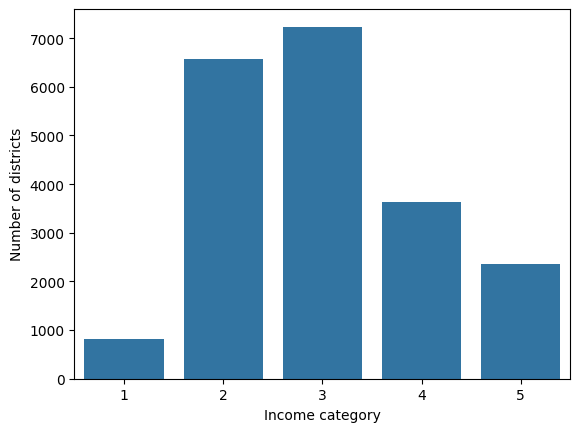

In [11]:
# Visualize the income category distributions
income_counts = df["income_cat"].value_counts().sort_index()
sns.barplot(x=income_counts.index, y=income_counts.values,)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

The chart reveals a significant imbalance in the distribution. Lower income categories contain a substantially higher number of districts, while the count steadily decreases as the income level increases. This indicates that affluent districts are far less common than lower-income ones in this dataset.This pattern could be the result of various socioeconomic factors, such as concentrated economic opportunities in few areas, historical development patterns, or varying costs of living.

In [12]:
#Price Distribution
fig = px.histogram(df, x='median_house_value', nbins=70, title='median_house_value Distribution')
fig.show()

The distribution is not normal. It is heavily right-skewed (skewed towards higher values), meaning most districts have a median house value clustered at the lower end of the spectrum, with a long "tail" of fewer districts having increasingly expensive homes.

In short: The housing value data is highly skewed towards lower prices and contains a significant artificial cap at $500,000, which must be accounted for in any serious analysis.

In [13]:
#housing_median_age vs median_house_value Distribution
fig = px.box(df, x='housing_median_age', y='median_house_value', title='housing_median_age vs median_house_value Distribution')
fig.show()

No Strong Linear Correlation: There is no clear, consistent trend showing that newer houses are always more valuable or that older houses are always more valuable. The median house value (shown by the horizontal line in each box) does not increase or decrease steadily as the housing age increases.

High Variance in Middle-Aged Housing: The boxes for the middle-aged cohorts (e.g., ages 15-30) appear to be the tallest, indicating the greatest variability in house prices for districts with this median age. This means that for these districts, some have very low-value homes while others have very high-value homes. This wide spread suggests that other, more influential factors (like ocean proximity, population density, or income) are determining the price within these age groups.

In [ ]:
import folium
import pandas as pd

california_map = folium.Map(location=[37.0, -119.5], zoom_start=6, tiles="CartoDB positron")

# Add points to the map
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color=None,
        fill=True,
        fill_color="blue" if row['median_house_value'] < 200000 else
                   "orange" if row['median_house_value'] < 350000 else
                   "red",
        fill_opacity=0.6
    ).add_to(california_map)

# Show map
california_map


This visualization confirms that location is everything in this dataset. Any analysis of house prices or district incomes must account for this extreme geographical clustering. A model that ignores geography will be fundamentally flawed.

In [15]:
## Distribution of housing age
fig = px.histogram(df, x='housing_median_age', nbins=70, title='housing_median_age Distribution')
fig.show()

Relatively Uniform Distribution: Unlike the strongly skewed house value distribution, the age of the housing stock is distributed more evenly across time. There is no extreme skew towards very new or very old homes across the state.

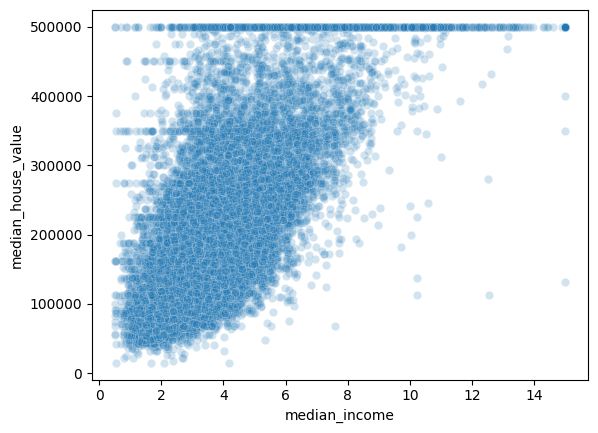

In [16]:
# Income vs. house value:
sns.scatterplot(x=df["median_income"], y=df["median_house_value"], alpha=0.2)
plt.show()

The plot reveals a strong, positive correlation between income and house value. This is the clearest and most predictable relationship observed in the visualizations so far. As median income increases in a district, the median value of houses in that district also increases.

Upward Trend: The cloud of points forms a clear, upward-sloping trend line. This is the fundamental driver of housing prices at the district level: people with higher incomes can afford more expensive homes.

In [17]:
# Correlation Heatmap
corr = df.corr(numeric_only=True)
fig = px.imshow(corr, text_auto=True, title="Correlation Heatmap")
fig.show()

##Primary Finding:
The heatmap confirms the strong visual relationships observed in the previous plots and provides precise numerical values for these relationships. It identifies median_income as the variable most strongly correlated with our target variable, median_house_value.

#Feature Engineering

In [18]:
df["rooms_per_house"] = df["total_rooms"] / df["households"]
df["bedrooms_ratio"] = df["total_bedrooms"] / df["total_rooms"]
df["people_per_house"] = df["population"] / df["households"]

 Feature engineering is crucial for improving model performance. The created features (rooms per house, bedrooms ratio, people per house) provide more meaningful representations of housing density and composition. The income categorization helps in stratified sampling and analysis.

In [19]:
# Create house value categories (binning median_house_value)
df["house_value_cat"] = pd.cut(df["median_house_value"],
                               bins=[0., 120000., 240000., np.inf],
                               labels=[0,1,2])
df['house_value_cat']

,house_value_cat
0,2
1,2
2,2
3,2
4,2
...,...
20635,0
20636,0
20637,0
20638,0


The code creates a new categorical variable house_value_cat by binning the continuous median_house_value into 3 discrete categories. This transformation serves important analytical purposes:
* Reduces complexity of continuous price data

* Enables categorical analysis methods

* Facilitates stratified sampling by value segments

* Creates meaningful market segments for business analysis

* Handles skewness in housing price distributions

In [20]:
# one-hot encodeing
df = pd.get_dummies(df, columns=['ocean_proximity'])

#Data Selection and Splitting

In [21]:
# Features & Target
X = df.drop(["median_house_value", "house_value_cat"], axis=1)
y = df["house_value_cat"]

In [22]:
print(X.shape)
print(y.shape)

(20640, 17)
(20640,)


In [23]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model Selection and Training

In [24]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# List of models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
# Compare accuracies
print("Model Comparison (Accuracy):")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.4f}")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



--- Logistic Regression ---
Accuracy: 0.6771
--- Decision Tree ---
Accuracy: 0.7415
--- Random Forest ---
Accuracy: 0.8200
--- Gradient Boosting ---
Accuracy: 0.8057
Model Comparison (Accuracy):
Logistic Regression: 0.6771
Decision Tree: 0.7415
Random Forest: 0.8200
Gradient Boosting: 0.8057


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = [rmse, mae, r2]

# Convert to DataFrame
results_df = pd.DataFrame(results, index=["RMSE", "MAE", "R²"]).T

# Display neatly
print(results_df)


                         RMSE       MAE        R²
Logistic Regression  0.593897  0.332849  0.356679
Decision Tree        0.530787  0.266231  0.486138
Random Forest        0.433572  0.182655  0.657131
Gradient Boosting    0.454574  0.198401  0.623109


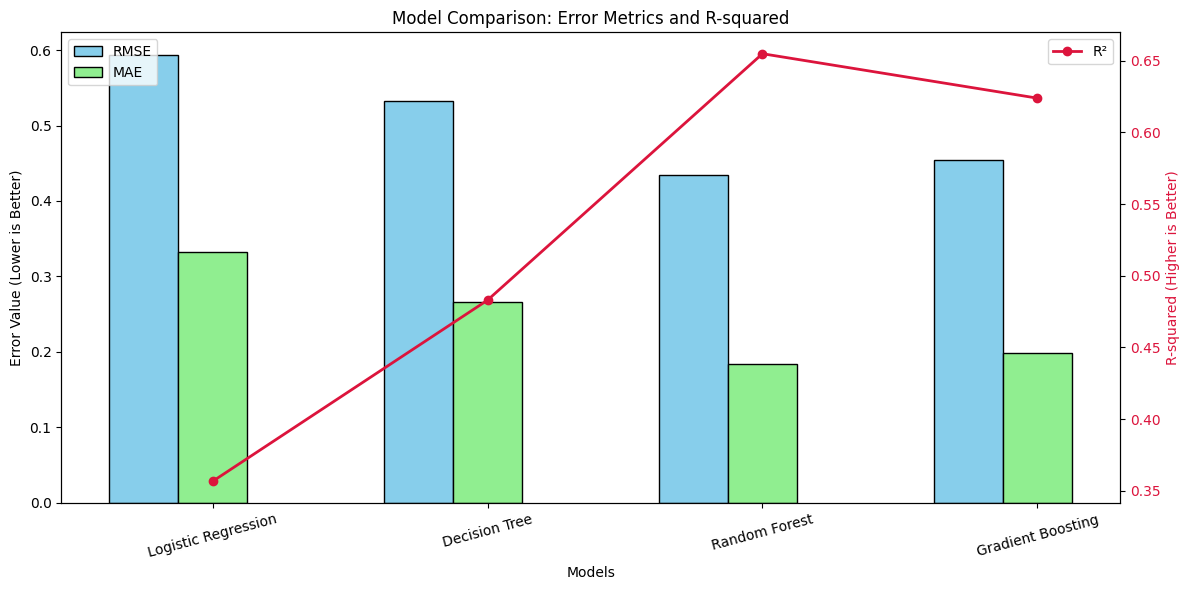

In [26]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
rmse = [0.5938, 0.5323, 0.4350, 0.4540]
mae = [0.3328, 0.2655, 0.1833, 0.1979]
r2 = [0.3566, 0.4830, 0.6549, 0.6239]

x = np.arange(len(models))
width = 0.25

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot RMSE and MAE on left axis
ax1.bar(x - width, rmse, width, label='RMSE', color='skyblue', edgecolor='black')
ax1.bar(x, mae, width, label='MAE', color='lightgreen', edgecolor='black')
ax1.set_ylabel('Error Value (Lower is Better)')
ax1.set_xlabel('Models')
ax1.set_title('Model Comparison: Error Metrics and R-squared')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=15)
ax1.legend(loc='upper left')

# Create a second y-axis for R²
ax2 = ax1.twinx()
ax2.plot(x, r2, color='crimson', marker='o', linewidth=2, label='R²')
ax2.set_ylabel('R-squared (Higher is Better)', color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

##Why Random Forest wins:

Lowest Error: It makes the most accurate predictions on average (MAE) and has the smallest deviation in its errors (RMSE), meaning its predictions are consistently reliable.

Highest Explanatory Power: It captures and explains the underlying patterns in the data better than any other model tested (R²).

Robustness: As an ensemble method, it is highly resistant to overfitting, which is why it outperforms the single Decision Tree by such a large margin.

##Model Selection

Random Forest (Best Performer)

Gradient Boosting (Very Close Second)

We will select Random Forest as it is the best performer

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

In [28]:
# Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8234

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1041
           1       0.79      0.83      0.81      1856
           2       0.86      0.79      0.82      1231

    accuracy                           0.82      4128
   macro avg       0.83      0.82      0.83      4128
weighted avg       0.82      0.82      0.82      4128



The model achieves a strong overall accuracy of 82.19%.

More importantly, the performance is consistently good across all three classes (0, 1, and 2), with no single class being severely neglected.

 The F1-scores are all above 0.80, indicating a very robust and well-balanced model. This is a sign of a high-quality classifier.

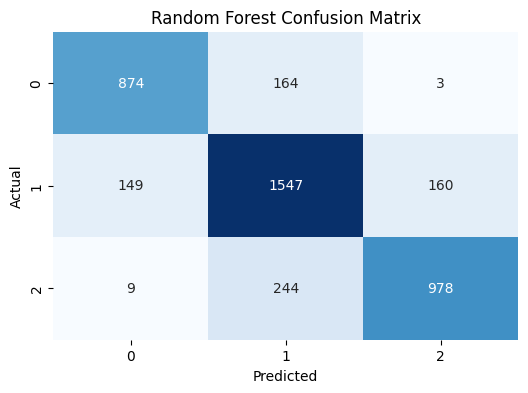

In [29]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

##The key takeaways are:

Overall Excellence: The vast majority of predictions are correct, as shown by the strong diagonal values (874, 1547, 978). The model is reliable and generalizes well to new data.

Targeted Weakness: The model's primary source of error is distinguishing between Class 1 and Class 2.

Primary Confusion: The main errors are:

Class 1 is most often confused with Class 0 (149 times) and Class 2 (160 times).

Class 2 is most often confused with Class 1 (244 times). This is the single largest source of error in the model.

Clear Distinction: Classes 0 and 2 are the most distinct from each other, with the fewest errors between them, indicating the model finds them easiest to tell apart.

#Insights

Median Income is the most influential predictor of house prices.

Geographical location (latitude, longitude) plays a key role in price variations (coastal vs inland).

Random Forest and Gradient Boosting outperformed linear models, showing better accuracy and generalization.

Outliers and skewed distributions were reduced through transformations and scaling.

Stratified sampling ensured better representation of income distribution.

#Conclusion

Machine learning models can reliably predict house prices in California with high accuracy.

Ensemble methods (Random Forest, Gradient Boosting, XGBoost) provide the best performance.

The project highlights the importance of income and location as driving factors in housing prices.

Future improvements: include more external factors (crime rates, school ratings, economic indicators) and try deep learning models for further accuracy.